In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
os.getcwd()

'e:\\subjects\\parallel_computing\\final_project\\test'

In [38]:
df = pd.read_csv('../data/output/mul_mat_times.csv')
df.head()

,number_of_computed,matmul_mono,broadcast_time,common_time,dns_time
0,3000x1024x1024,30.106,24.216,14.790,3.776
1,3333x768x768,35.829,15.371,8.762,2.427
2,490x64x64,0.000,0.014,0.008,0.004
3,200x128x128,0.010,0.004,0.008,0.007
4,500x256x256,0.148,0.037,0.052,0.037


In [39]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


Text(0.5, 1.0, 'Matrix Multiplication Time Comparison 8 Threads')

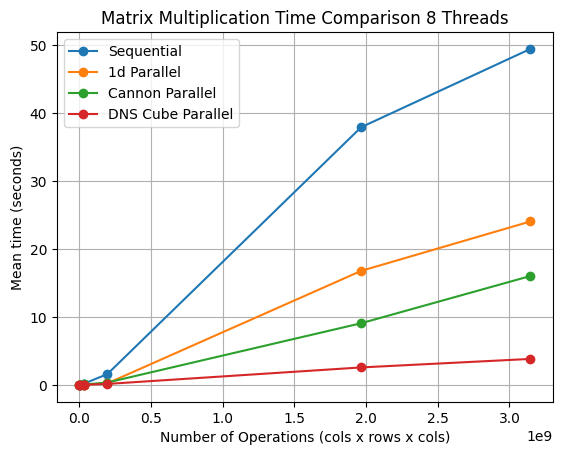

In [ ]:
plt.plot(y, times_mono, label='Sequential', marker='o')
plt.plot(y, times_board_cast, label='1d Parallel', marker='o')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.grid()
plt.title('Matrix Multiplication Time Comparison 8 Threads')

In [ ]:
df = pd.read_csv('../data/output/mul_mat_times_9_threads.csv')
df.head()

,number_of_computed,broadcast_time,common_time,dns_time
0,3000x1024x1024,23.663,7.922,3.900
1,3333x768x768,15.526,4.331,2.318
2,490x64x64,0.016,0.007,0.005
3,200x128x128,0.000,0.000,0.018
4,500x256x256,0.039,0.033,0.025


In [29]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    # times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


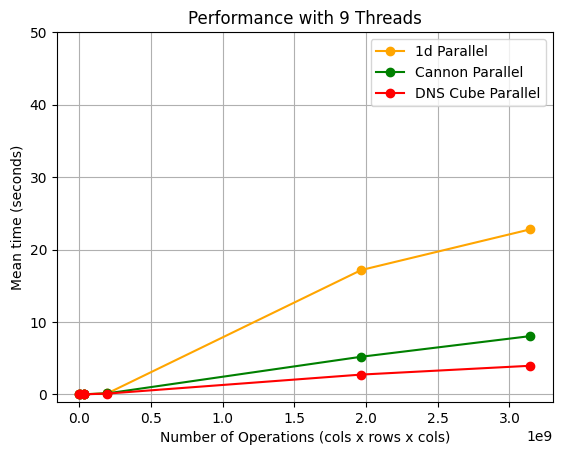

In [31]:
# plt.plot(y, times_mono, label='Sequential', marker='o')
plt.plot(y, times_board_cast, label='1d Parallel', marker='o', color='orange')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o', color='green')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o', color='red')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.title('Performance with 9 Threads')
plt.ylim(-1, 50)
plt.grid()

## 10 Threads

In [32]:
df = pd.read_csv('../data/output/mul_mat_times_10_threads.csv')
df.head()

,number_of_computed,broadcast_time,common_time,dns_time
0,3000x1024x1024,21.999,8.156,4.117
1,3333x768x768,17.672,4.890,2.760
2,490x64x64,0.005,0.012,0.007
3,200x128x128,0.002,0.009,0.006
4,500x256x256,0.034,0.032,0.032


In [33]:
n = df['number_of_computed'].values
times_mono = []
times_board_cast = []
times_cannon = []
times_dsn = []
# sorted(n)
n = np.array([i[0] * i[1] * i[2] for i in [list(map(int, x.split('x'))) for x in df['number_of_computed'].values]])
y = sorted(set(n))

for i in y:
    # times_mono.append(df['matmul_mono'][n==i].mean())
    times_board_cast.append(df['broadcast_time'][n==i].mean())
    times_cannon.append(df['common_time'][n==i].mean())
    times_dsn.append(df['dns_time'][n==i].mean())


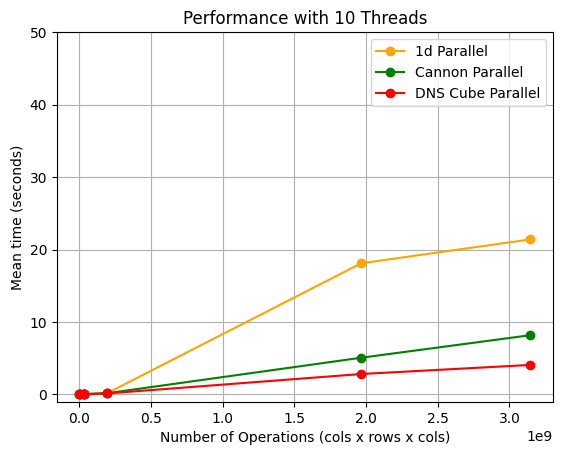

In [35]:
# plt.plot(y, times_mono, label='Sequential', marker='o')
plt.plot(y, times_board_cast, label='1d Parallel', marker='o', color='orange')
plt.plot(y, times_cannon, label='Cannon Parallel', marker='o', color='green')
plt.plot(y, times_dsn, label='DNS Cube Parallel', marker='o', color='red')

plt.legend()
plt.xlabel('Number of Operations (cols x rows x cols)')
plt.ylabel('Mean time (seconds)')
plt.title('Performance with 10 Threads')
plt.ylim(-1, 50)
plt.grid()

## 11 threads

## 12 threads